<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/07_cnn_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN CIFAR-10

In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
K = len(set(y_train.flatten()))

Epoch 1/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5107 - accuracy: 0.4524 - val_loss: 1.2457 - val_accuracy: 0.5524
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1827 - accuracy: 0.5790 - val_loss: 1.0904 - val_accuracy: 0.6054
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0225 - accuracy: 0.6368 - val_loss: 1.0046 - val_accuracy: 0.6446
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8935 - accuracy: 0.6832 - val_loss: 0.9278 - val_accuracy: 0.6778
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7934 - accuracy: 0.7200 - val_loss: 0.8817 - val_accuracy: 0.6971
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6984 - accuracy: 0.7547 - val_loss: 0.8797 - val_accuracy: 0.6893
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6196 - accuracy: 0.7826 - val_loss: 0.8791 - val_accuracy:

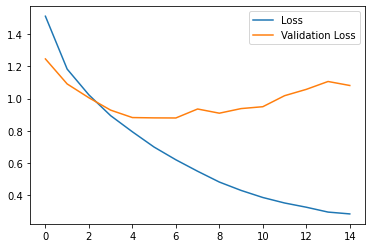

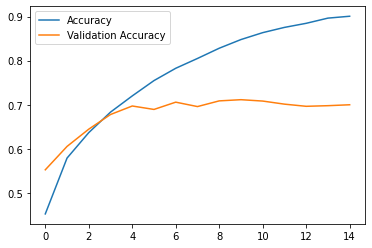

313/313 [==============================] - 0s 1ms/step - loss: 1.0808 - accuracy: 0.6999
Accuracy: 0.6998999714851379


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(K, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

Confusion matrix, without normalization
[[761  21  34  28  10   9   8  14  66  49]
 [ 16 819   8   4   3   2  11   3  39  95]
 [ 76   7 581  82  71  64  54  30  14  21]
 [ 23  16  70 488  60 176  63  34  24  46]
 [ 26   4  73  77 608  51  49  90  16   6]
 [ 17  11  52 175  36 605  26  47  16  15]
 [  3  11  40  67  33  38 766  15  10  17]
 [ 13   4  21  41  49  70   9 762  10  21]
 [ 56  27  19  11   4   6   5   2 830  40]
 [ 38  98  10  18   3  10   3  16  25 779]]


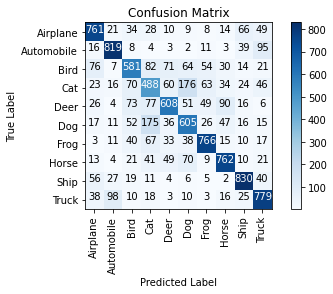

In [5]:
labels = [
    'Airplane', 
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck',
]

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, labels)

## Display a random misclassified image

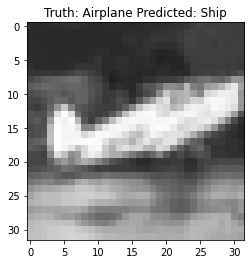

In [6]:
misclassified_idx = np.where(p_test != y_test)[0]
i =  np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title(f'Truth: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}')
plt.show()